# PRISM gene manual
This is a code for calling genes by manually set the area on color space. Data for HCC2D is shown here and other data can be processed using similar strategy with slightly different parameters.

In [2]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm import tqdm


CHANNELS = ['cy5', 'TxRed', 'cy3', 'FAM']
BASE_DIR = Path('../dataset/processed')
RUN_ID = 'PRISM2D_HCC'
src_dir = BASE_DIR / f'{RUN_ID}'
read_dir = src_dir / 'readout'
os.makedirs(read_dir, exist_ok=True)

In [3]:
intensity_all = pd.read_csv(read_dir/'intensity.csv')

# preprocess of intensity

In [4]:
# Scale
intensity_all['Scaled_R'] = intensity_all['R']
intensity_all['Scaled_Ye'] = intensity_all['Ye']
intensity_all['Scaled_G'] = intensity_all['G'] * 2.5
intensity_all['Scaled_B'] = intensity_all['B']
# intensity['G/A'] = intensity['G/A'] * np.exp(0.8 * intensity['Ye/A'])

In [5]:
intensity_all['sum'] = intensity_all['Scaled_R'] + intensity_all['Scaled_Ye'] + intensity_all['Scaled_B']
intensity_all['sum_G'] = intensity_all['Scaled_R'] + intensity_all['Scaled_Ye'] + intensity_all['Scaled_B'] + intensity_all['Scaled_G']
#filter by sum value (QC)
#intensity_all = intensity_all.drop(intensity_all[intensity_all['sum'] < 500].index)
intensity_all = intensity_all.drop(intensity_all[intensity_all['sum_G'] < 500].index)
intensity_all = intensity_all.drop(intensity_all[intensity_all['sum'] > 50000].index)
intensity_all = intensity_all.dropna()

#intensity_all.to_csv(read_dir/'PRISM_Spot_intensity.csv')
intensity_all['R/A'] = intensity_all['Scaled_R'] / intensity_all['sum']
intensity_all['Ye/A'] = intensity_all['Scaled_Ye'] / intensity_all['sum']
intensity_all['B/A'] = intensity_all['Scaled_B'] / intensity_all['sum']
intensity_all['G/A'] = intensity_all['Scaled_G'] / intensity_all['sum']
intensity_all['X_coor'] = 2*intensity_all['R/A'] - 1
intensity_all['Y_coor'] = intensity_all['B/A'] - intensity_all['Ye/A']
# intensity_all['G/A'][intensity_all['G/A'] > 5] = 5

In [6]:
#crosstalk elimination
intensity_all['B'] = intensity_all['B'] - intensity_all['G'] * 0.25 #0.35
intensity_all = np.maximum(intensity_all,0)
#intensity_all.to_csv(read_dir/'intensity_all_5x5_cross_corrected.csv')

#Scale
intensity_all['Scaled_R'] = intensity_all['R']
intensity_all['Scaled_Ye'] = intensity_all['Ye']
intensity_all['Scaled_G'] = intensity_all['G'] * 2.5
intensity_all['Scaled_B'] = intensity_all['B'] #* 4/3
intensity_all['sum'] = intensity_all['Scaled_R'] + intensity_all['Scaled_Ye'] + intensity_all['Scaled_B']
intensity_all['sum_G'] = intensity_all['Scaled_R'] + intensity_all['Scaled_Ye'] + intensity_all['Scaled_B'] + intensity_all['Scaled_G']

#filter by sum value (QC)
#intensity_all = intensity_all.drop(intensity_all[intensity_all['sum'] < 1000].index)
intensity_all = intensity_all.drop(intensity_all[intensity_all['sum_G'] < 1000].index)
intensity_all = intensity_all.drop(intensity_all[intensity_all['sum'] > 20000].index)
#intensity_all.to_csv(read_dir/'PRISM_Spot_intensity.csv')
intensity_all['R/A'] = intensity_all['Scaled_R'] / intensity_all['sum']
intensity_all['Ye/A'] = intensity_all['Scaled_Ye'] / intensity_all['sum']
intensity_all['B/A'] = intensity_all['Scaled_B'] / intensity_all['sum']
intensity_all['G/A'] = intensity_all['Scaled_G'] / intensity_all['sum']
#intensity_all = intensity_all.drop(intensity_all[intensity_all['G/A'] > 5].index) ########

intensity_all['X_coor'] = 2*intensity_all['R/A'] - 1
intensity_all['Y_coor'] = intensity_all['B/A'] - intensity_all['Ye/A']

In [7]:
intensity_all = intensity_all.drop(intensity_all[intensity_all['G/A'] > 5].index)

In [8]:
intensity_all

Unnamed: 0        Y        X        R      Ye       G        B  \
1               1.0   2552.0  27994.0  12640.0     0.0     0.0     0.00   
2               2.0   6469.0  24166.0  12441.0   535.0  4020.0  2660.00   
3               3.0   8241.0  24186.0  12229.0   485.0  3800.0  2590.00   
4               4.0   8161.0  24412.0  11611.0   581.0  4090.0  6282.50   
5               5.0   6792.0  24142.0  11135.0   882.0  2860.0  2297.00   
...             ...      ...      ...      ...     ...     ...      ...   
4841956   1231354.0  17870.0  29106.0      0.0     0.0   121.0  2938.75   
4841957   1231355.0  11824.0   6246.0    253.0   685.0   121.0   372.75   
4841969   1231367.0  26067.0  33586.0   4302.0   238.0   121.0     0.00   
4841970   1231368.0  25547.0  23756.0   2881.0  3202.0   121.0     0.00   
4841976   1231374.0  29103.0  29126.0    791.0     0.0   121.0  4604.75   

         Scaled_R  Scaled_Ye  Scaled_G  Scaled_B       sum     sum_G  \
1         12640.0        0.0       0.0      0.00  12640.00  12640.00   
2         12441.0      535.0   10050.0   2660.00  15636.00  25686.00   
3         12229.0      485.0    9500.0   2590.00  15304.00  24804.00   
4         11611.0      581.0   10225.0   6282.50  18474.50  28699.50   
5         11135.0      882.0    7150.0   2297.00  14314.00  21464.00   
...           ...        ...       ...       ...       ...       ...   
4841956       0.0        0.0     302.5   2938.75   2938.75   3241.25   
4841957     253.0      685.0     302.5    372.75   1310.75   1613.25   
4841969    4302.0      238.0     302.5      0.00   4540.00   4842.50   
4841970    2881.0     3202.0     302.5      0.00   6083.00   6385.50   
4841976     791.0        0.0     302.5   4604.75   5395.75   5698.25   

              R/A      Ye/A       B/A       G/A    X_coor    Y_coor  
1        1.000000  0.000000  0.000000  0.000000  1.000000  0.000000  
2        0.795664  0.034216  0.170120  0.642748  0.591328  0.135904  
3        0.799072  0.031691  0.169237  0.620753  0.598144  0.137546  
4        0.628488  0.031449  0.340063  0.553466  0.256976  0.308615  
5        0.777910  0.061618  0.160472  0.499511  0.555819  0.098854  
...           ...       ...       ...       ...       ...       ...  
4841956  0.000000  0.000000  1.000000  0.102935 -1.000000  1.000000  
4841957  0.193019  0.522602  0.284379  0.230784 -0.613961 -0.238222  
4841969  0.947577  0.052423  0.000000  0.066630  0.895154 -0.052423  
4841970  0.473615  0.526385  0.000000  0.049729 -0.052770 -0.526385  
4841976  0.146597  0.000000  0.853403  0.056063 -0.706806  0.853403  

[3945161 rows x 19 columns]

In [9]:
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib as mpl

# plt.style.use('dark_background')
# # fake data:

# a = intensity_low['Y_coor']
# b = intensity_low['X_coor']

# plt.hist2d(a, b, (500, 500),norm = mpl.colors.LogNorm(),cmap=plt.cm.gnuplot2, vmin=8, vmax=500)
# plt.colorbar()

# plt.ylim([-1.2,1.2])
# plt.xlim([-1.2,1.2])

# plt.style.use('default')
# plt.savefig(read_dir/'15_density_1.jpg')

# visualization of intensity

Text(0.5, 0.92, '3D scatter plot')

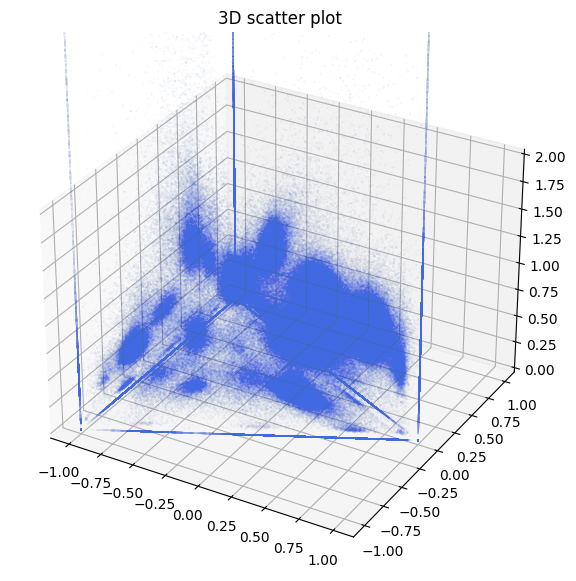

In [10]:
import matplotlib.pyplot as plt


sample = intensity_all[['X_coor','Y_coor','G/A']].sample(frac=0.7,replace=True, random_state=1)
sample = sample[sample['G/A']<20]
#3D plot
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(sample['X_coor'], sample['Y_coor'], sample['G/A'], color = "royalblue",s=0.0002,alpha=0.5)
ax.set_zlim3d(0,2)
plt.title("3D scatter plot")
#plt.savefig(read_dir/'colorcoding_3D_1.jpg')

In [35]:
sample = intensity_all.sample(frac=0.05,replace=True, random_state=1)

C:\Users\Mingchuan\AppData\Local\Temp\ipykernel_15616\94929205.py:24: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.pane.fill = False
C:\Users\Mingchuan\AppData\Local\Temp\ipykernel_15616\94929205.py:25: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.pane.fill = False
C:\Users\Mingchuan\AppData\Local\Temp\ipykernel_15616\94929205.py:26: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.pane.fill = False


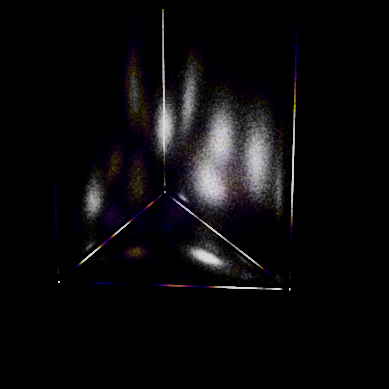

In [36]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

mu, sigma = 0, 0.1 
x = np.array(sample['X_coor'])
y = np.array(sample['Y_coor'])
z = np.array(sample['G/A'])

xyz = np.vstack([x,y,z])
density = stats.gaussian_kde(xyz)(xyz) 

idx = density.argsort()
x, y, z, density = x[idx], y[idx], z[idx], density[idx]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=density, cmap=plt.cm.gnuplot2 ,s=0.001,vmin=0.03, vmax=0.4) #0.4 
ax.set_zlim3d(0, 1)
fig.set_facecolor('black')
ax.set_facecolor('black') 
ax.grid(False) 
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.set_axis_off()
plt.show()
# plt.savefig(read_dir/'3D_density_sampled_0.1_5.jpg')

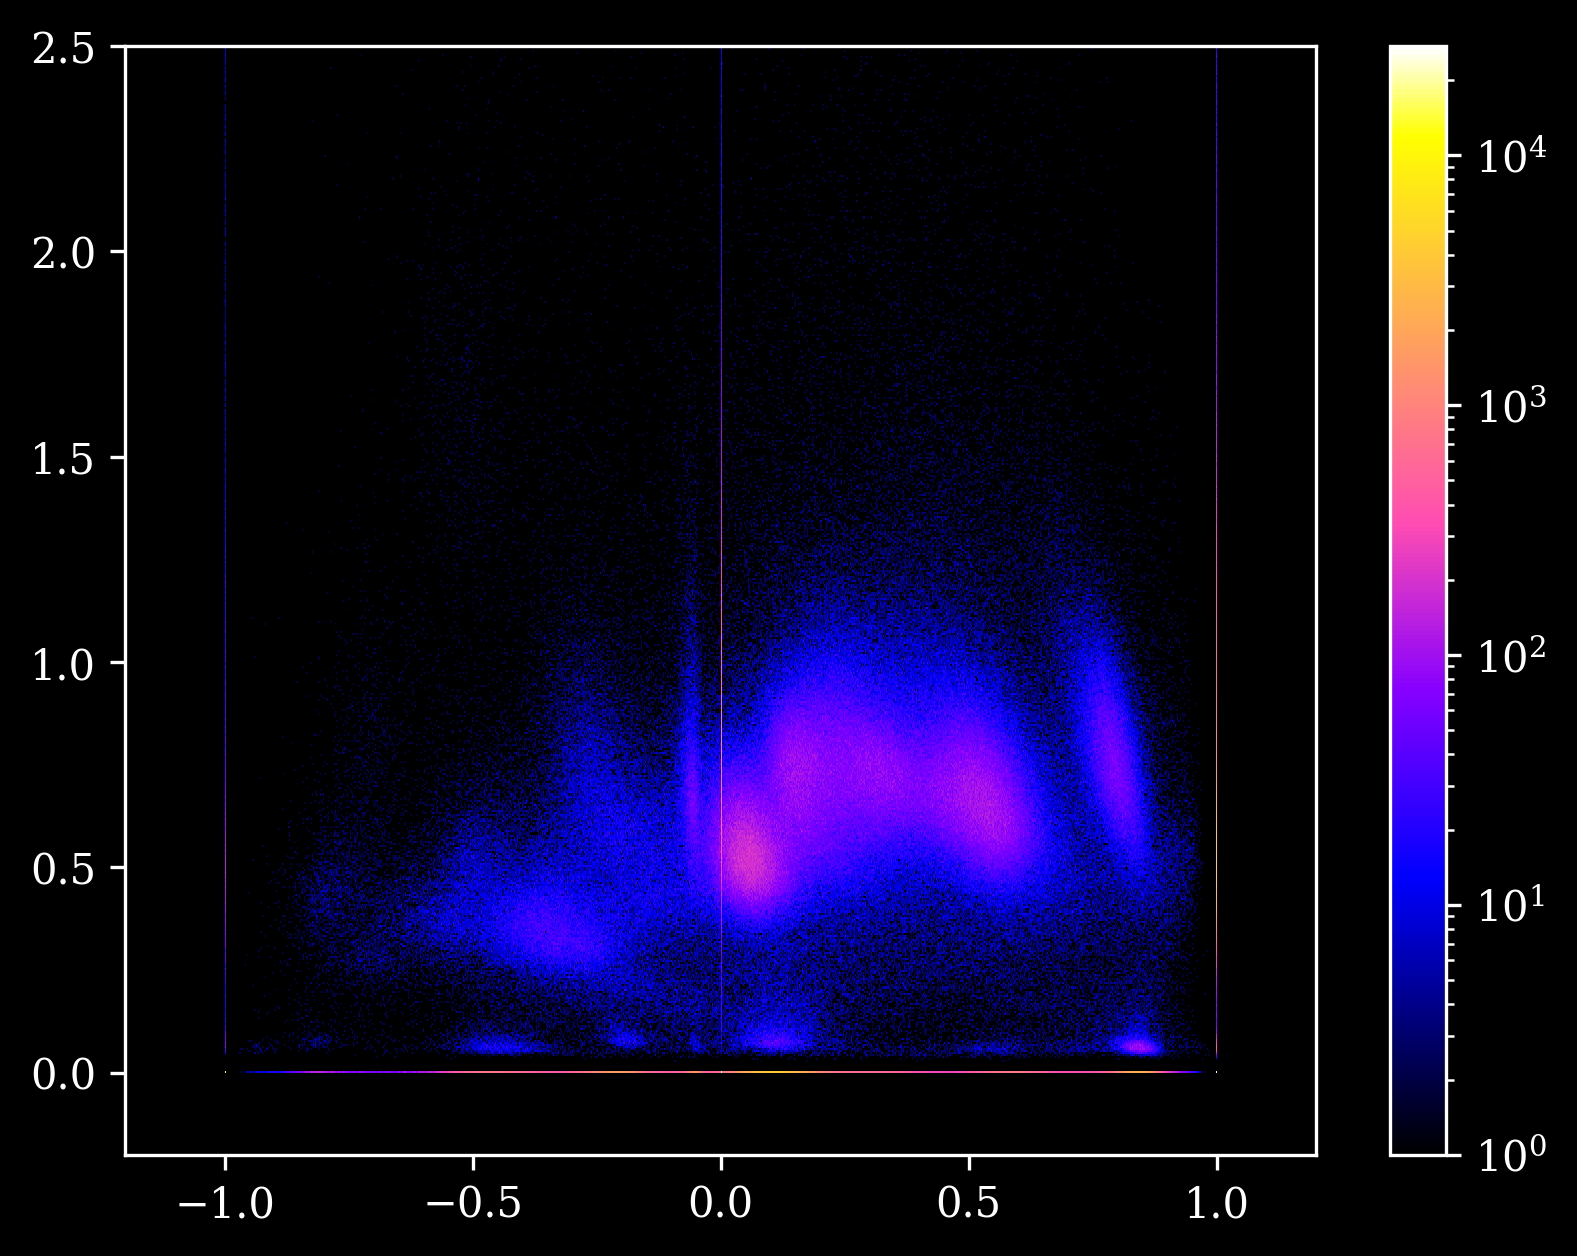

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('dark_background')
# fake data:

a = intensity_all['Y_coor']
b = intensity_all['G/A']

plt.hist2d(a, b, (1000, 1000), norm = mpl.colors.LogNorm(), cmap=plt.cm.gnuplot2, ) # vmin=5, vmax=200)
plt.colorbar()

plt.ylim([-0.2,2.5])
plt.xlim([-1.2,1.2])

plt.style.use('default')
plt.show()

(-0.1, 2.5)

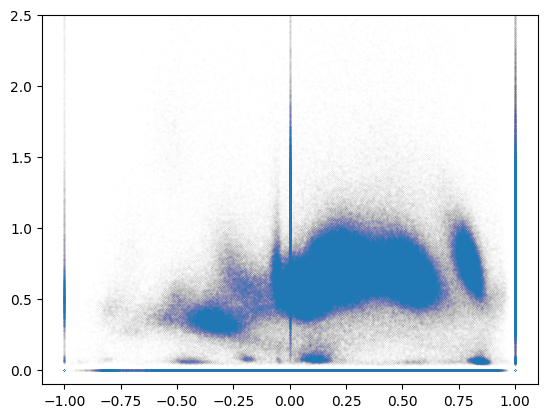

In [13]:
plt.style.use('default')
plt.scatter(intensity_all['Y_coor'],intensity_all['G/A'],s=0.001,alpha=0.05,linewidths=None)
plt.ylim([-0.1,2.5])
#plt.xlim([-1,1])
#plt.savefig(read_dir/'0G_1G.jpg')

In [ ]:
# intensity_all.to_csv(read_dir/'Data_for_mCube_Thermo_E13.5_10um_Hyb5.csv')

In [15]:
intensity_low = intensity_all[intensity_all['G/A']<=0.1]
# intensity_medium = intensity_all.loc[(intensity_all['G/A']>=0.2)&(intensity_all['G/A']<=0.6)]
intensity_high = intensity_all[intensity_all['G/A']>=0.3]

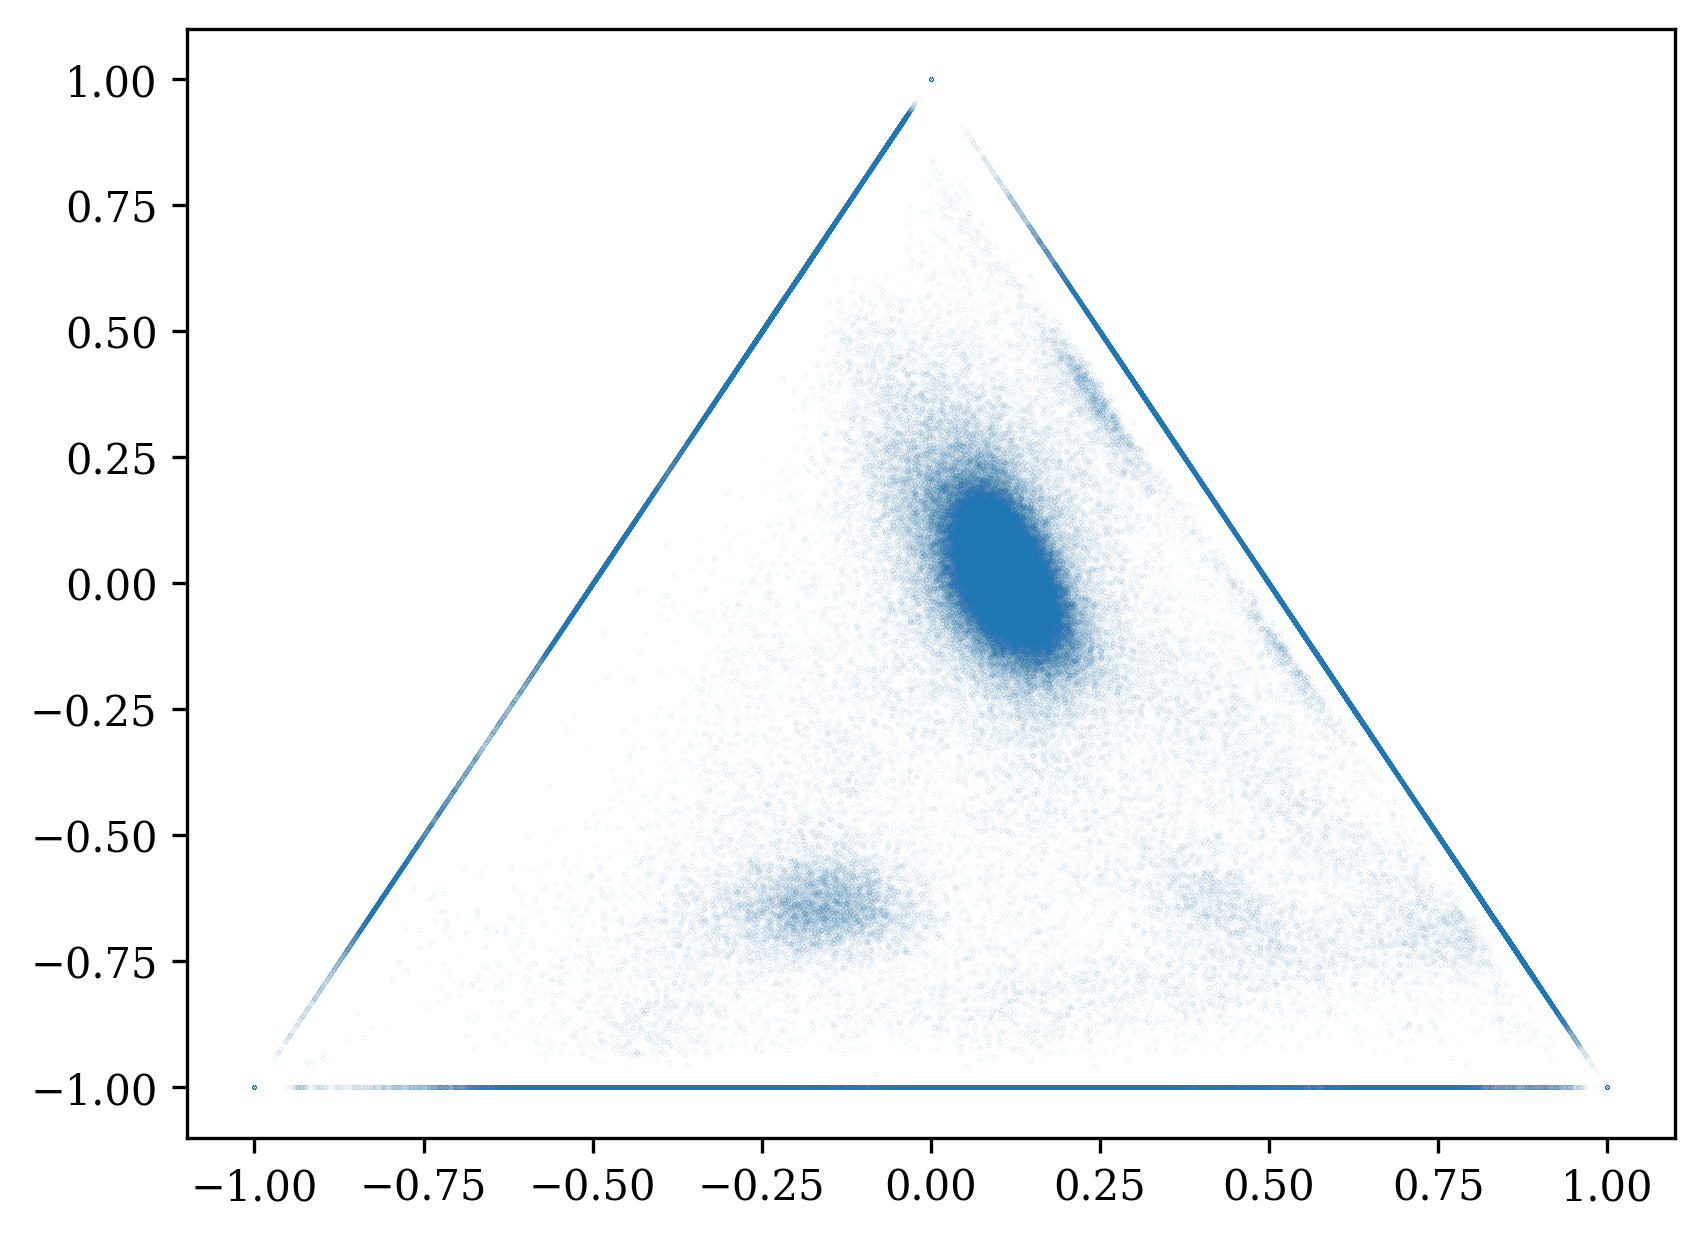

In [36]:
plt.scatter(intensity_low['Y_coor'],intensity_low['X_coor'],s=0.009,alpha=0.05,linewidths=None)
plt.savefig(read_dir/'triangle_0G.jpg')

In [ ]:
# plt.scatter(intensity_medium['Y_coor'],intensity_medium['X_coor'],s=0.009,alpha=0.05,linewidths=None)
# plt.savefig(read_dir/'triangle_0.5G.jpg')

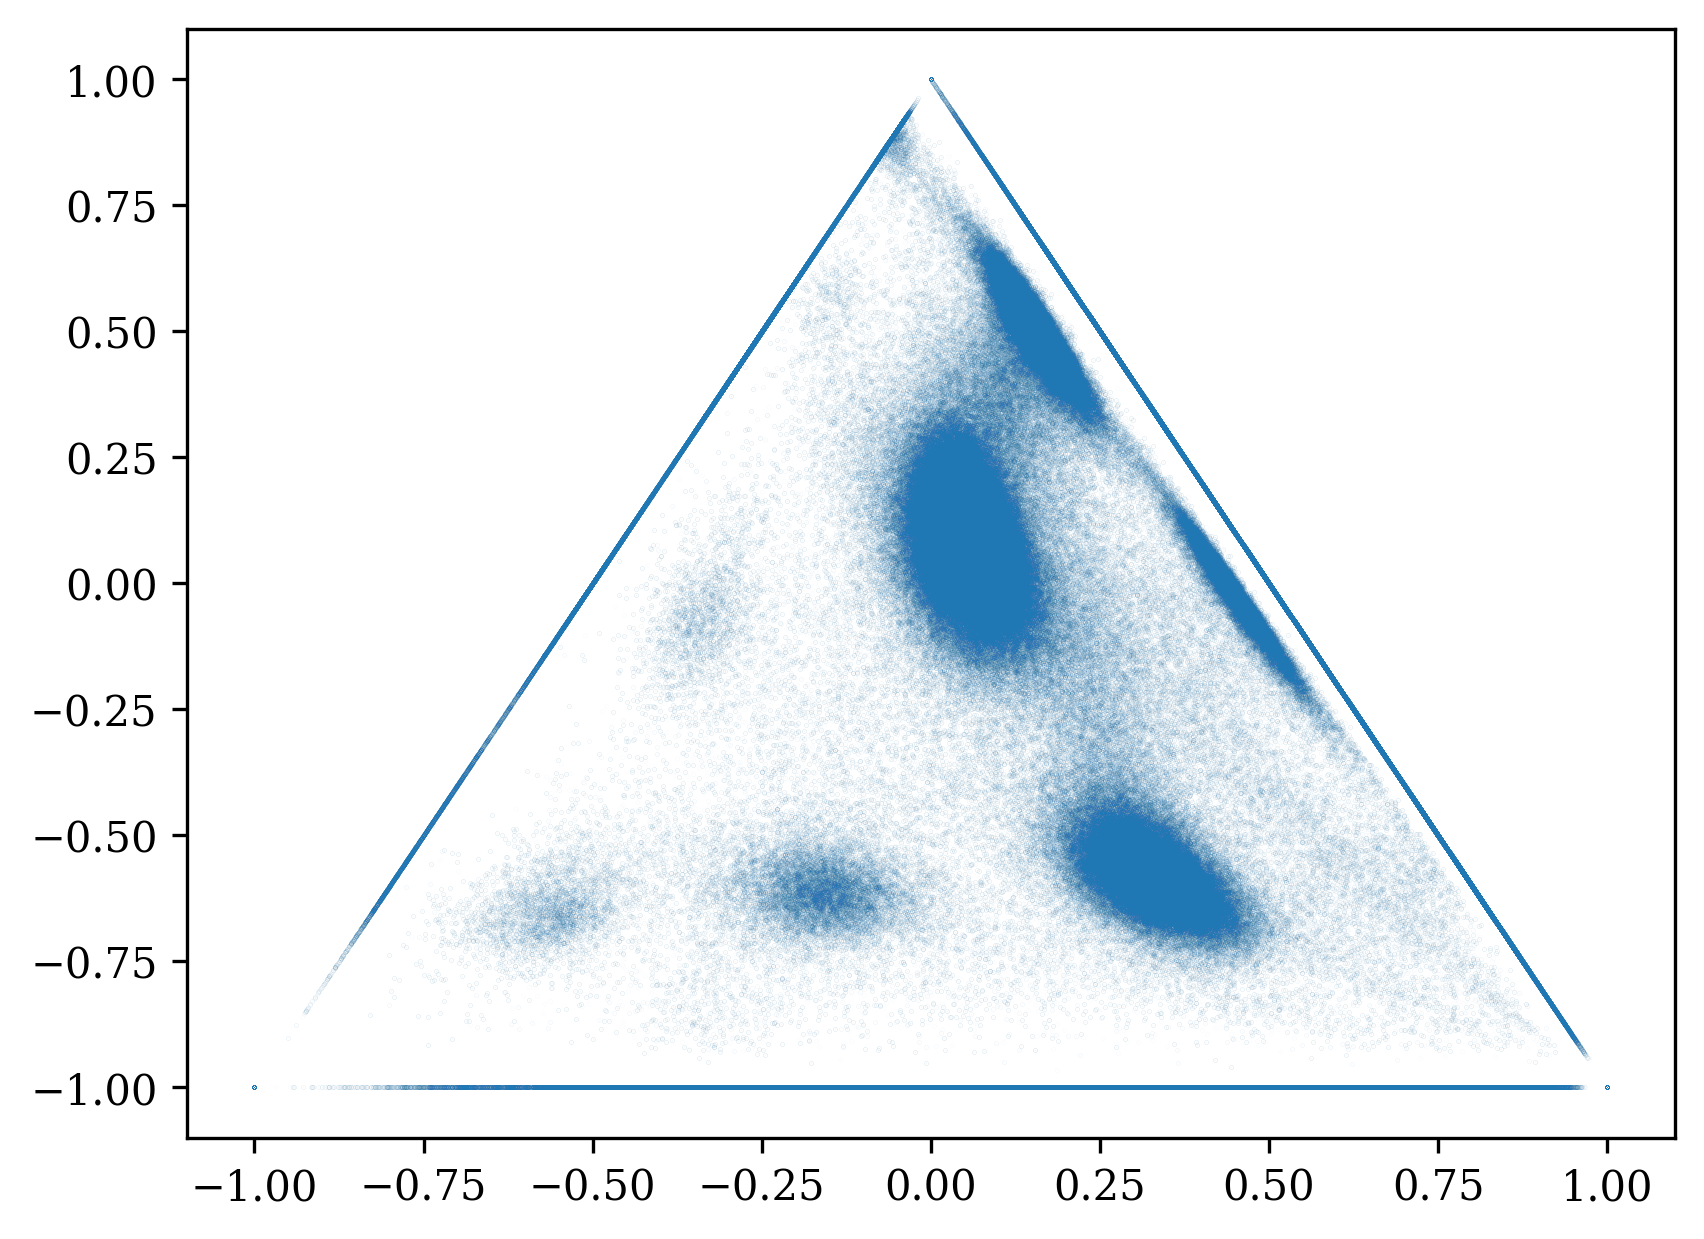

In [35]:
plt.scatter(intensity_high['Y_coor'],intensity_high['X_coor'],s=0.009,alpha=0.05,linewidths=None)
plt.savefig(read_dir/'triangle_1G.jpg')

Peaks range of RY [(-1.0, -0.99), (-0.45999999999999996, -0.30999999999999994), (-0.29999999999999993, 0.21999999999999997), (0.22999999999999998, 0.79), (0.99, 1.0)] 

Peaks range of RB [(-1.0, -0.99), (-0.98, -0.42999999999999994), (-0.42000000000000004, 0.08000000000000007), (0.99, 1.0)] 

Peaks range of BY [(-1.0, -0.99), (-0.88, -0.10999999999999999), (-0.09999999999999998, 0.5700000000000001), (0.5800000000000001, 0.8700000000000001), (0.8800000000000001, 0.97), (0.99, 1.0)] 



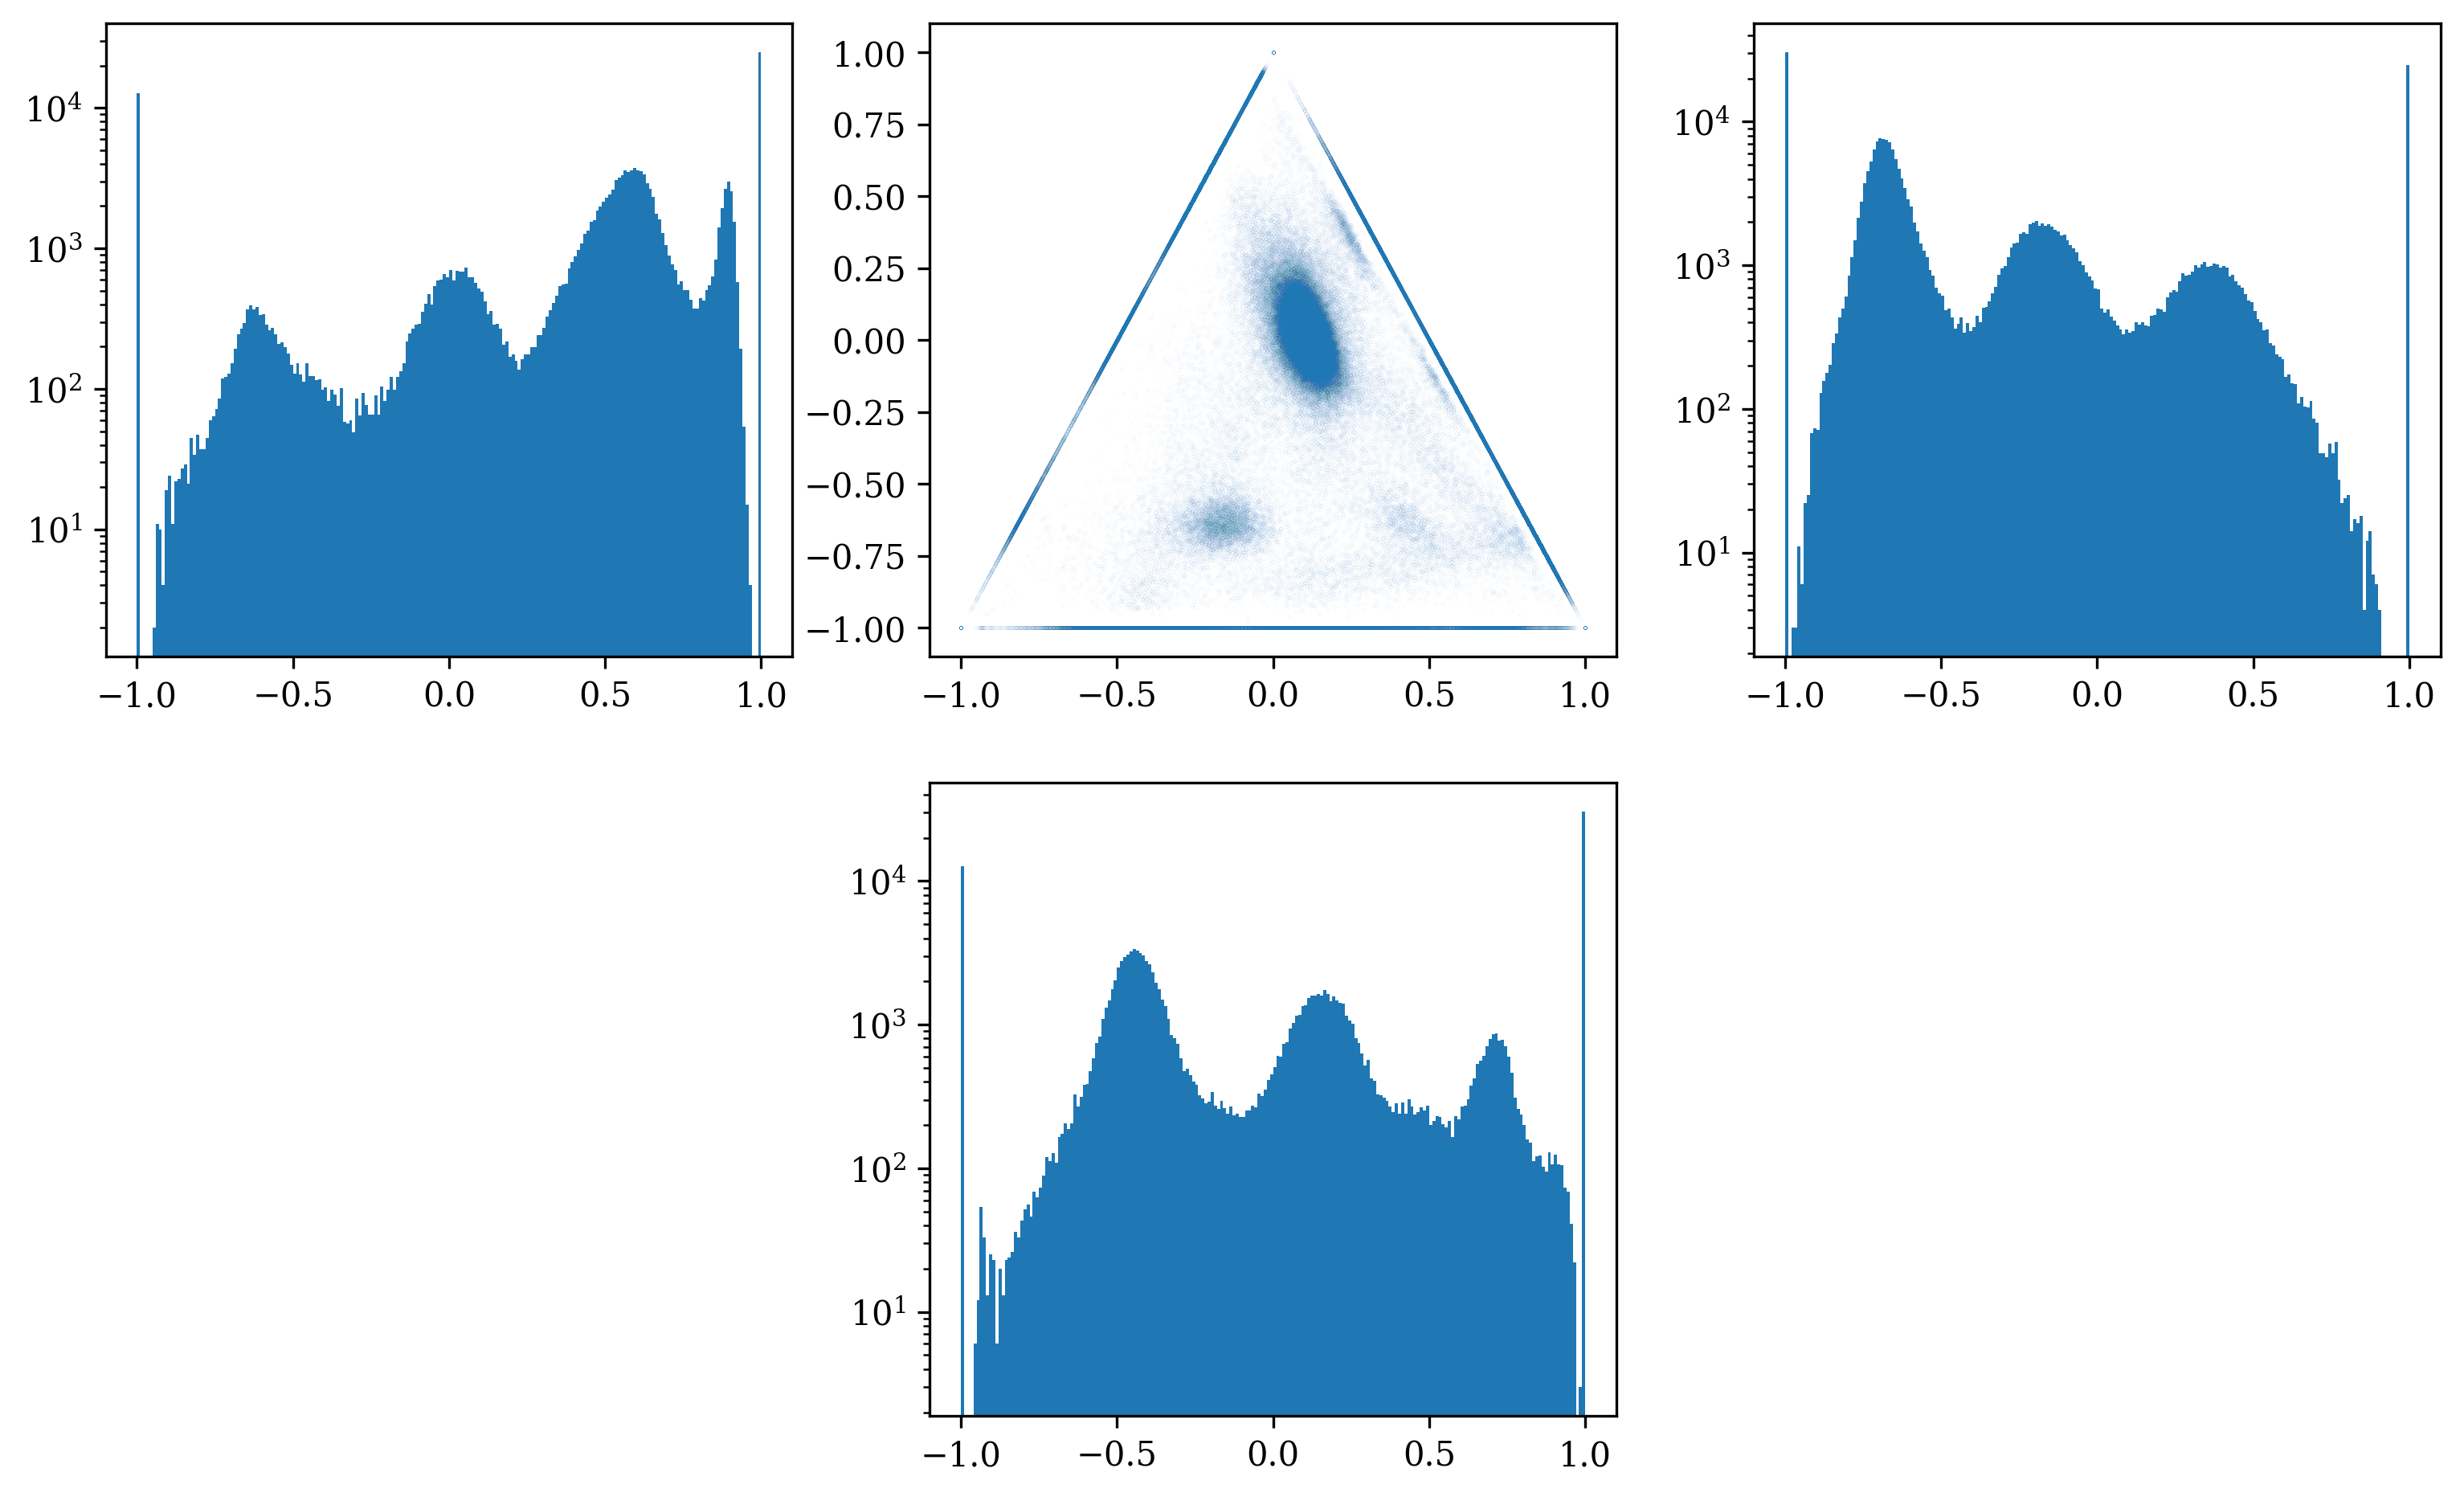

In [33]:
from xml.dom.expatbuilder import InternalSubsetExtractor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema
matplotlib.rcParams.update({
    "pgf.texsystem": "xelatex",
    'font.family': 'serif',
    'text.usetex': False,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
})


def plot_freq(intensity, colorline, layer='1G', layer_threshold=0.25, order=5, contraction=0, vlines=True, curvefit_range=None, curvefit_p0=None,curvefit_pvalue=0.05, curvefit_colorset=['red', 'yellow', 'green'], save=False, read_dir=None):
    '''
    Plot a frequency plot.

    Parameters
    -----------
    intensity: pandas dataframe.
    colorline: projection line. 'RY', 'RB' or 'BY'.
    layer: the 4th color. '0G' or '1G'.
    layer_threshold: threshold of the 4th color. For '0G', it is the upper limit. For '1G', it is the lower limit.
    order: how many points on each side to use for the comparison to consider. For details, see scipy.signal.argrelextrema.
    contraction: distance between two peaks (= contraction*2). 
    vlines: whether to plot peak boundaries or not.
    curvefit_range: peak range to fit curve.
    curvefit_p0: initial guess for the parameters (length N). For details, see scipy.optimize.curve_fit.
    save: whether to save the plot alone.
    read_dir: 
    '''
    
    def gaussian(x, mu, sigma, A):
        return A*np.exp(-(x-mu)**2/(2*(sigma**2)))

    def mixgaussian(x, mu1, mu2, mu3, sigma1, sigma2, sigma3, A1, A2, A3):
        return gaussian(x, mu1, sigma1, A1) + gaussian(x, mu2, sigma2, A2) + gaussian(x, mu3, sigma3, A3)

    if layer == '0G':
        intensity = intensity[intensity['G/A'] <= layer_threshold]
    elif layer == '1G':
        intensity = intensity[intensity['G/A'] >= layer_threshold]

    if colorline == 'RY':
        intensity = intensity[intensity['B/A'] == 0] 
        intensity = intensity['R/A'] - intensity['Ye/A']
    elif colorline == 'RB':
        intensity = intensity[intensity['Ye/A'] == 0]
        intensity = intensity['R/A'] - intensity['B/A']
    elif colorline == 'BY':
        intensity = intensity[intensity['R/A'] == 0]
        intensity = intensity['B/A'] - intensity['Ye/A']

    hist = plt.hist(pd.DataFrame(intensity), bins = 200, log=True)
    freq, bins = hist[0], hist[1]
    extrema_less = argrelextrema(freq, np.less, order=order)[0] # assuming two side have 0, execute this code, or skip it
    # extrema_less = np.insert(extrema_less, 0, 3)
    # extrema_less = np.append(extrema_less, -3)
    bins_less = [(bins[extrema_less[i-1]+1]+contraction, bins[extrema_less[i]]-contraction) if i>0 else (bins[0], bins[1]) for i in range(len(extrema_less))]
    bins_less.append((bins[-2], bins[-1]))
    print('Peaks range of', colorline, bins_less, '\n')

    if vlines:
        plt.vlines([i[0] for i in bins_less], 0, 10000, linestyles='dashed', colors='red')
        plt.vlines([i[1] for i in bins_less], 0, 10000, linestyles='dashed', colors='green')

    if curvefit_range:
        confidence = 1 - curvefit_pvalue
        if confidence == 0.9:
            z = 1.28
        elif confidence == 0.95:
            z = 1.64

        start_idx, end_idx = curvefit_range[0], curvefit_range[1]
        bins_ = (bins[1:] + bins[:-1])/2 # for len(bins_) == len(freq)
        popt, pcov = curve_fit(mixgaussian, bins_[start_idx:end_idx], freq[start_idx:end_idx], p0=curvefit_p0, maxfev=1000000)
        # print('Fitting parameters: mu1, mu2, mu3, sigma1, sigma2, sigma3, A1, A2, A3\n', popt, '\n')
        # plt.plot(bins_[start_idx:end_idx], mixgaussian(bins_[start_idx:end_idx], *popt))

        # plot fitting curve separately: curve 1, curve 2, curve 3
        # curve 1
        mu, sigma, A = popt[0], popt[3], popt[6]
        plt.plot(bins_, gaussian(bins_, mu=mu, sigma=sigma, A=A), color=curvefit_colorset[0])
        print('Gaussian Curve 1: {A:.2f}*np.exp(-(x-{mu:.2f})**2/(2*({sigma:.2f}**2)))'.format(mu=mu, sigma=sigma, A=A))
        print(confidence*100, '% confidence interval:', [mu-z*sigma, mu+z*sigma])
        # curve 2
        mu, sigma, A = popt[1], popt[4], popt[7]
        plt.plot(bins_, gaussian(bins_, mu=mu, sigma=sigma, A=A), color=curvefit_colorset[1])
        print('Gaussian Curve 2: {A:.2f}*np.exp(-(x-{mu:.2f})**2/(2*({sigma:.2f}**2)))'.format(mu=mu, sigma=sigma, A=A))
        print(confidence*100, '% confidence interval:', [mu-z*sigma, mu+z*sigma])
        # curve 3
        mu, sigma, A = popt[2], popt[5], popt[8]
        plt.plot(bins_, gaussian(bins_, mu=mu, sigma=sigma, A=A), color=curvefit_colorset[2])
        print('Gaussian Curve 3: {A:.2f}*np.exp(-(x-{mu:.2f})**2/(2*({sigma:.2f}**2)))'.format(mu=mu, sigma=sigma, A=A))
        print(confidence*100, '% confidence interval:', [mu-z*sigma, mu+z*sigma])

    if save:
        if read_dir:
            plt.savefig(read_dir / (colorline+'_'+layer+'.jpg'))
        else:
            print('Input a read_dir to save the plot.\n') # Maybe a warning or error

# plots: scatter + frequency plot in three dimension
fig = plt.figure()    # 生成新的画布fig
fig.set_size_inches(12.5, 7.5)     # 调整画布为合适大小

p0 = [-1, 1, 1, 1, 3, 3]
plt.subplot(232)  # scatter
plt.scatter(intensity_low['Y_coor'], intensity_low['X_coor'], s=0.0009, alpha=0.08, linewidths=None)
plt.subplot(231)   # red-yellow
plot_freq(intensity_all, colorline='RY', layer='0G', layer_threshold=0.1, vlines=False,curvefit_pvalue=0.05)#, curvefit_range=(10,190), curvefit_p0=(-0.5, 0, 0.5, 0.1, 0.1, 0.1, 1500, 500, 22000),curvefit_colorset=['gold', 'darkorange', 'orangered'])#, save=True, read_dir=src_dir / 'readout')
plt.subplot(233)   # red-blue
plot_freq(intensity_all, colorline='RB', layer='0G', layer_threshold=0.1, vlines=False,curvefit_pvalue=0.1)#, curvefit_range=(10,190), curvefit_p0=(-0.7, -0.25, 0.35, 0.1, 0.1, 0.1, 5000, 5000, 5000),curvefit_colorset=['darkviolet', 'magenta', 'deeppink'])#, save=True, read_dir=src_dir / 'readout')
plt.subplot(235)   # yellow-blue
plot_freq(intensity_all, colorline='BY', layer='0G', layer_threshold=0.1, vlines=False,curvefit_pvalue=0.1, save=True, read_dir=src_dir / 'readout')#, curvefit_range=(20,190), curvefit_p0=(-0.4, 0.2, 0.6, 0.1, 0.1, 0.1, 3000, 10000, 20000),curvefit_colorset=['greenyellow', 'springgreen', 'deepskyblue'], save=True, read_dir=src_dir / 'readout')

plt.show()

Peaks range of RY [(-1.0, -0.99), (-0.38, -0.29999999999999993), (-0.29000000000000004, -0.24), (-0.22999999999999998, -0.020000000000000018), (-0.010000000000000009, 0.10000000000000009), (0.1100000000000001, 0.27), (0.28, 0.74), (0.99, 1.0)] 

Peaks range of RB [(-1.0, -0.99), (-0.29999999999999993, 0.25), (0.26, 0.31000000000000005), (0.32000000000000006, 0.95), (0.99, 1.0)] 

Peaks range of BY [(-1.0, -0.99), (-0.85, -0.6599999999999999), (-0.6499999999999999, -0.33999999999999997), (-0.32999999999999996, -0.24), (-0.22999999999999998, -0.14), (-0.13, -0.04999999999999993), (-0.040000000000000036, 0.14000000000000012), (0.99, 1.0)] 



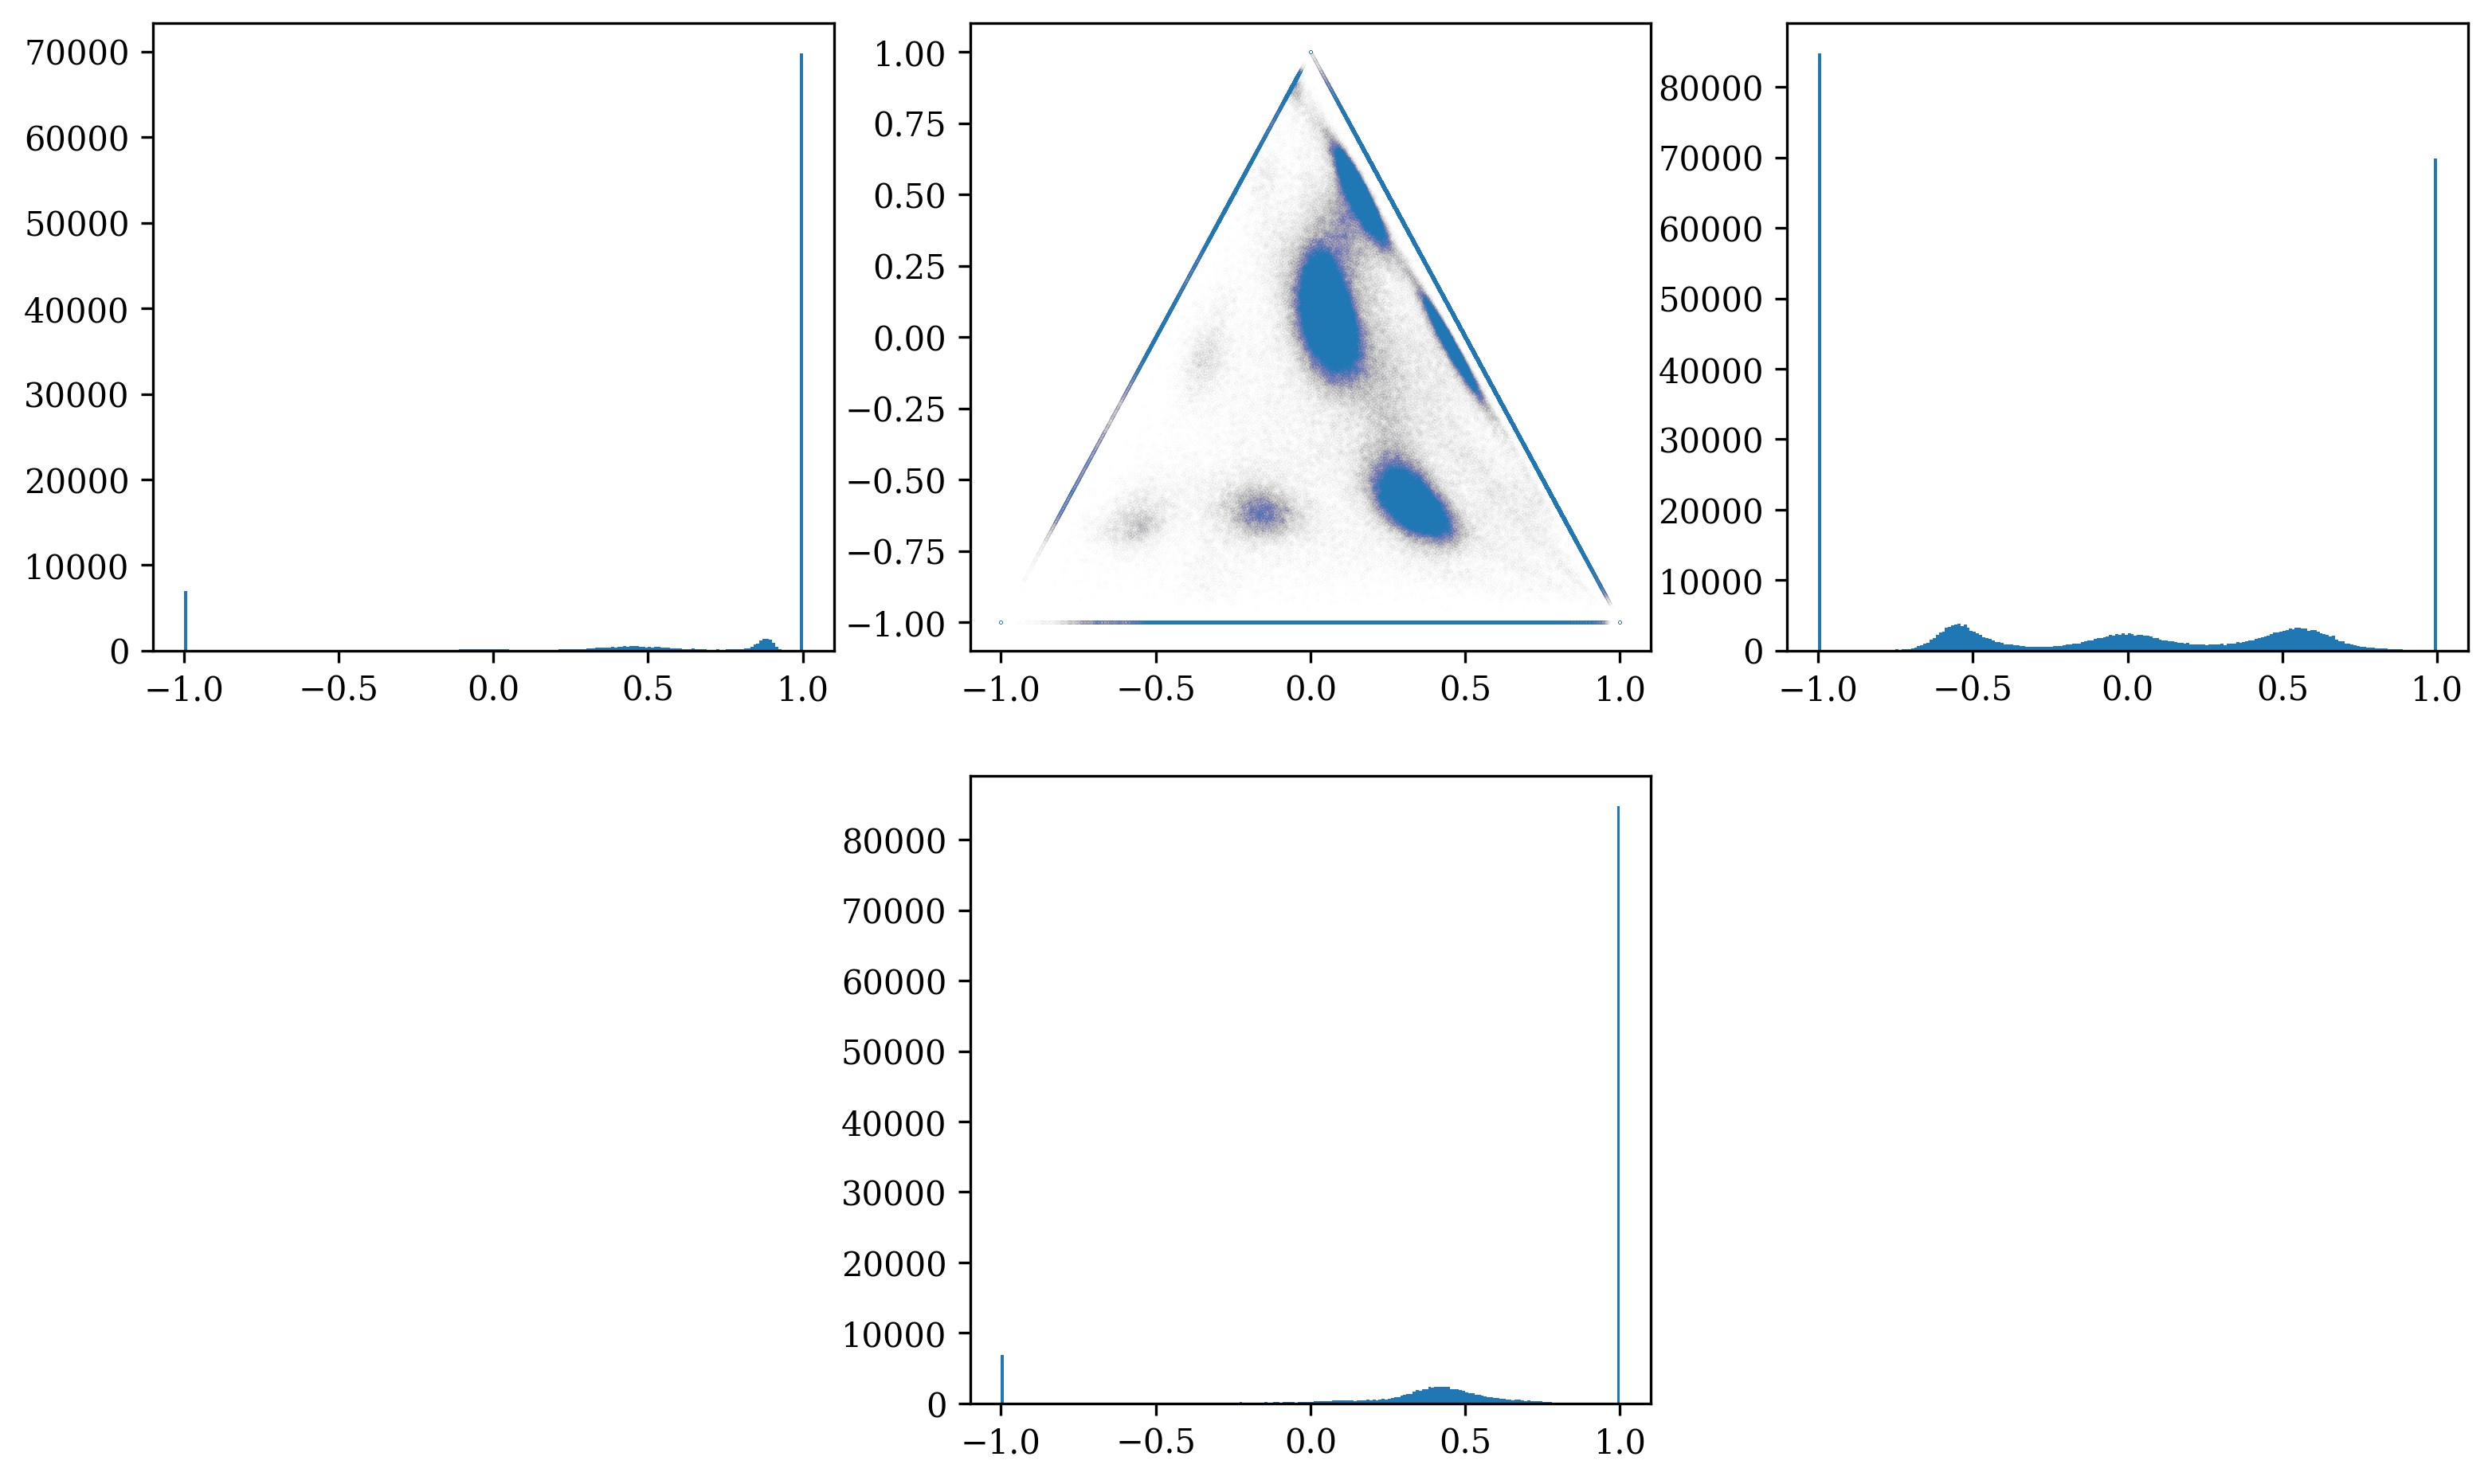

In [17]:
from pickle import TRUE
from xml.dom.expatbuilder import InternalSubsetExtractor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema
matplotlib.rcParams.update({
    "pgf.texsystem": "xelatex",
    'font.family': 'serif',
    'text.usetex': False,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
})


def plot_freq(intensity, colorline, layer='1G', layer_threshold=0.25, order=5, contraction=0, vlines=True, curvefit_range=None, curvefit_p0=None,curvefit_pvalue=0.1, curvefit_colorset=['red', 'yellow', 'green'], save=False, read_dir=None):
    '''
    Plot a frequency plot.

    Parameters
    -----------
    intensity: pandas dataframe.
    colorline: projection line. 'RY', 'RB' or 'BY'.
    layer: the 4th color. '0G' or '1G'.
    layer_threshold: threshold of the 4th color. For '0G', it is the upper limit. For '1G', it is the lower limit.
    order: how many points on each side to use for the comparison to consider. For details, see scipy.signal.argrelextrema.
    contraction: distance between two peaks (= contraction*2). 
    vlines: whether to plot peak boundaries or not.
    curvefit_range: peak range to fit curve.
    curvefit_p0: initial guess for the parameters (length N). For details, see scipy.optimize.curve_fit.
    save: whether to save the plot alone.
    read_dir: 
    '''
    
    def gaussian(x, mu, sigma, A):
        return A*np.exp(-(x-mu)**2/(2*(sigma**2)))

    def mixgaussian(x, mu1, mu2, mu3, sigma1, sigma2, sigma3, A1, A2, A3):
        return gaussian(x, mu1, sigma1, A1) + gaussian(x, mu2, sigma2, A2) + gaussian(x, mu3, sigma3, A3)

    if layer == '0G':
        intensity = intensity[intensity['G/A'] <= layer_threshold]
    elif layer == '1G':
        intensity = intensity[intensity['G/A'] >= layer_threshold]

    if colorline == 'RY':
        intensity = intensity[intensity['B/A'] == 0] 
        intensity = intensity['R/A'] - intensity['Ye/A']
    elif colorline == 'RB':
        intensity = intensity[intensity['Ye/A'] == 0]
        intensity = intensity['R/A'] - intensity['B/A']
    elif colorline == 'BY':
        intensity = intensity[intensity['R/A'] == 0]
        intensity = intensity['B/A'] - intensity['Ye/A']

    hist = plt.hist(pd.DataFrame(intensity), bins = 200)#, log = TRUE)
    freq, bins = hist[0], hist[1]
    extrema_less = argrelextrema(freq, np.less, order=order)[0] # assuming two side have 0, execute this code, or skip it
    # extrema_less = np.insert(extrema_less, 0, 3)
    # extrema_less = np.append(extrema_less, -3)
    bins_less = [(bins[extrema_less[i-1]+1]+contraction, bins[extrema_less[i]]-contraction) if i>0 else (bins[0], bins[1]) for i in range(len(extrema_less))]
    bins_less.append((bins[-2], bins[-1]))
    print('Peaks range of', colorline, bins_less, '\n')

    if vlines:
        plt.vlines([i[0] for i in bins_less], 0, 10000, linestyles='dashed', colors='red')
        plt.vlines([i[1] for i in bins_less], 0, 10000, linestyles='dashed', colors='green')

    if curvefit_range:
        confidence = 1 - curvefit_pvalue
        if confidence == 0.9:
            z = 1.28
        elif confidence == 0.95:
            z = 1.64
        start_idx, end_idx = curvefit_range[0], curvefit_range[1]
        bins_ = (bins[1:] + bins[:-1])/2 # for len(bins_) == len(freq)
        popt, pcov = curve_fit(mixgaussian, bins_[start_idx:end_idx], freq[start_idx:end_idx], p0=curvefit_p0, maxfev=1000000)
        # print('Fitting parameters: mu1, mu2, mu3, sigma1, sigma2, sigma3, A1, A2, A3\n', popt, '\n')
        # plt.plot(bins_[start_idx:end_idx], mixgaussian(bins_[start_idx:end_idx], *popt))

        # plot fitting curve separately: curve 1, curve 2, curve 3
        # curve 1
        mu, sigma, A = popt[0], popt[3], popt[6]
        plt.plot(bins_, gaussian(bins_, mu=mu, sigma=sigma, A=A), color=curvefit_colorset[0])
        print('Gaussian Curve 1: {A:.2f}*np.exp(-(x-{mu:.2f})**2/(2*({sigma:.2f}**2)))'.format(mu=mu, sigma=sigma, A=A))
        print(confidence*100, '% confidence interval:', [mu-z*sigma, mu+z*sigma])
        # curve 2
        mu, sigma, A = popt[1], popt[4], popt[7]
        plt.plot(bins_, gaussian(bins_, mu=mu, sigma=sigma, A=A), color=curvefit_colorset[1])
        print('Gaussian Curve 2: {A:.2f}*np.exp(-(x-{mu:.2f})**2/(2*({sigma:.2f}**2)))'.format(mu=mu, sigma=sigma, A=A))
        print(confidence*100, '% confidence interval:', [mu-z*sigma, mu+z*sigma])
        # curve 3
        mu, sigma, A = popt[2], popt[5], popt[8]
        plt.plot(bins_, gaussian(bins_, mu=mu, sigma=sigma, A=A), color=curvefit_colorset[2])
        print('Gaussian Curve 3: {A:.2f}*np.exp(-(x-{mu:.2f})**2/(2*({sigma:.2f}**2)))'.format(mu=mu, sigma=sigma, A=A))
        print(confidence*100, '% confidence interval:', [mu-z*sigma, mu+z*sigma])

    if save:
        if read_dir:
            plt.savefig(read_dir / (colorline+'_'+layer+'.jpg'))
        else:
            print('Input a read_dir to save the plot.\n') # Maybe a warning or error

# plots: scatter + frequency plot in three dimension
fig = plt.figure()    # 生成新的画布fig
fig.set_size_inches(12.5, 7.5)     # 调整画布为合适大小

p0 = [-1, 1, 1, 1, 3, 3]
plt.subplot(232)  # scatter
plt.scatter(intensity_high['Y_coor'], intensity_high['X_coor'], s=0.00009, alpha=0.08, linewidths=None)
plt.subplot(231)   # red-yellow
plot_freq(intensity_all, colorline='RY', layer='1G', layer_threshold=0.8, vlines=False)#, curvefit_range=(10,160), curvefit_p0=(-0.55, -0.05, 0.45, 0.1, 0.1, 0.1, 1000, 1000, 6000),curvefit_colorset=['gold', 'darkorange', 'orangered'])#, save=True, read_dir=src_dir / 'readout')
plt.subplot(233)   # red-blue
plot_freq(intensity_all, colorline='RB', layer='1G', layer_threshold=0.8, vlines=False)#, curvefit_range=(10,160), curvefit_p0=(-0.6, -0.25, 0.35, 0.1, 0.1, 0.1, 5000, 5000, 5000),curvefit_colorset=['darkviolet', 'magenta', 'deeppink'])#, save=True, read_dir=src_dir / 'readout')
plt.subplot(235)   # yellow-blue
plot_freq(intensity_all, colorline='BY', layer='1G', layer_threshold=0.8, vlines=False, save=True, read_dir=src_dir / 'readout')#, curvefit_range=(20,190), curvefit_p0=(-0.4, 0.2, 0.6, 0.1, 0.1, 0.1, 3000, 10000, 20000),curvefit_colorset=['greenyellow', 'springgreen', 'deepskyblue'], save=True, read_dir=src_dir / 'readout')

plt.show()

# mannual threshold of genes

In [ ]:
#intensity_all['Gene'] = intensity_all['X_coor'].apply(lambda x: 'PRISM_1' if x >= 0.9 else 'Other')

In [ ]:
#

G_Low_Thre = 0.15
G_High_Thre = 0.25

PRISM_1_XL = 0.83

PRISM_2_XL = 0.17
PRISM_2_XH = 0.79

PRISM_3_XL = -0.29
PRISM_3_XH = 0.16

PRISM_4_XL = -0.8
PRISM_4_XH = -0.33

PRISM_5_XH = -0.99

PRISM_6_XL = -0.83
PRISM_6_XH = -0.28

PRISM_7_XL = -0.27
PRISM_7_XH = 0.3

PRISM_8_XL = 0.44
PRISM_8_XH = 0.83

PRISM_9_XL = 0.99

PRISM_10_XL = -0.85
PRISM_10_XH = -0.35

PRISM_11_XL = -0.34
PRISM_11_XH = 0.19

PRISM_12_XL = 0.21
PRISM_12_XH = 0.75 #

PRISM_13_XL = -0.25
PRISM_13_XH = 0.22
PRISM_13_YL = -0.05
PRISM_13_YH = 0.22

PRISM_14_XL = -0.8
PRISM_14_XH = -0.5
PRISM_14_YL = -0.5
PRISM_14_YH = 0

PRISM_15_XL = -0.75
PRISM_15_XH = -0.5
PRISM_15_YL = 0.2
PRISM_15_YH = 0.5

PRISM_16_XL = 0.99 # 0.78 #0.76
#PRISM_16_XH = 0.75

PRISM_17_XL = 0.17
PRISM_17_XH = 0.73

PRISM_18_XL = -0.36
PRISM_18_XH = 0.16 #

PRISM_19_XL = -0.8
PRISM_19_XH = -0.37

PRISM_20_XH = -0.72 #contract!

PRISM_21_XL = -0.61
PRISM_21_XH = -0.16

PRISM_22_XL = -0.07
PRISM_22_XH = 0.09

PRISM_23_XL = 0.14
PRISM_23_XH = 0.8

PRISM_24_XL = 0.99

PRISM_25_XL = -0.8 #
PRISM_25_XH = -0.31

PRISM_26_XL = -0.26
PRISM_26_XH = 0.32

PRISM_27_XL = 0.43 # 0.32 before 12
PRISM_27_XH = 0.8 #

PRISM_28_XL = -0.25
PRISM_28_XH = 0.22
PRISM_28_YL = -0.1
PRISM_28_YH = 0.18

PRISM_29_XL = -0.8
PRISM_29_XH = -0.5
PRISM_29_YL = -0.4
PRISM_29_YH = -0.05

PRISM_30_XL = -0.75
PRISM_30_XH = -0.35 # after 4 # before HCC12 it was -0.4
PRISM_30_YL = 0.0
PRISM_30_YH = 0.45

PRISM_2_XL_Range = 0.9*PRISM_2_XL+0.1*PRISM_2_XH
PRISM_2_XH_Range = 0.1*PRISM_2_XL+0.9*PRISM_2_XH
PRISM_3_XL_Range = 0.9*PRISM_3_XL+0.1*PRISM_3_XH
PRISM_3_XH_Range = 0.1*PRISM_3_XL+0.9*PRISM_3_XH
PRISM_4_XL_Range = 0.9*PRISM_4_XL+0.1*PRISM_4_XH
PRISM_4_XH_Range = 0.1*PRISM_4_XL+0.9*PRISM_4_XH
PRISM_6_XL_Range = 0.9*PRISM_6_XL+0.1*PRISM_6_XH
PRISM_6_XH_Range = 0.1*PRISM_6_XL+0.9*PRISM_6_XH
PRISM_7_XL_Range = 0.9*PRISM_7_XL+0.1*PRISM_7_XH
PRISM_7_XH_Range = 0.1*PRISM_7_XL+0.9*PRISM_7_XH
PRISM_8_XL_Range = 0.9*PRISM_8_XL+0.1*PRISM_8_XH
PRISM_8_XH_Range = 0.1*PRISM_8_XL+0.9*PRISM_8_XH
PRISM_10_XL_Range = 0.9*PRISM_10_XL+0.1*PRISM_10_XH
PRISM_10_XH_Range = 0.1*PRISM_10_XL+0.9*PRISM_10_XH
PRISM_11_XL_Range = 0.9*PRISM_11_XL+0.1*PRISM_11_XH
PRISM_11_XH_Range = 0.1*PRISM_11_XL+0.9*PRISM_11_XH
PRISM_12_XL_Range = 0.9*PRISM_12_XL+0.1*PRISM_12_XH
PRISM_12_XH_Range = 0.1*PRISM_12_XL+0.9*PRISM_12_XH

#PRISM_16_XL_Range = 0.9*PRISM_16_XL+0.1*PRISM_16_XH
#PRISM_16_XH_Range = 0.1*PRISM_16_XL+0.9*PRISM_16_XH
PRISM_17_XL_Range = 0.9*PRISM_17_XL+0.1*PRISM_17_XH
PRISM_17_XH_Range = 0.1*PRISM_17_XL+0.9*PRISM_17_XH
PRISM_18_XL_Range = 0.9*PRISM_18_XL+0.1*PRISM_18_XH
PRISM_18_XH_Range = 0.1*PRISM_18_XL+0.9*PRISM_18_XH
PRISM_19_XL_Range = 0.9*PRISM_19_XL+0.1*PRISM_19_XH
PRISM_19_XH_Range = 0.1*PRISM_19_XL+0.9*PRISM_19_XH
PRISM_21_XL_Range = 0.9*PRISM_21_XL+0.1*PRISM_21_XH
PRISM_21_XH_Range = 0.1*PRISM_21_XL+0.9*PRISM_21_XH
PRISM_22_XL_Range = 0.9*PRISM_22_XL+0.1*PRISM_22_XH
PRISM_22_XH_Range = 0.1*PRISM_22_XL+0.9*PRISM_22_XH
PRISM_23_XL_Range = 0.9*PRISM_23_XL+0.1*PRISM_23_XH
PRISM_23_XH_Range = 0.1*PRISM_23_XL+0.9*PRISM_23_XH
PRISM_25_XL_Range = 0.9*PRISM_25_XL+0.1*PRISM_25_XH
PRISM_25_XH_Range = 0.1*PRISM_25_XL+0.9*PRISM_25_XH
PRISM_26_XL_Range = 0.9*PRISM_26_XL+0.1*PRISM_26_XH
PRISM_26_XH_Range = 0.1*PRISM_26_XL+0.9*PRISM_26_XH
PRISM_27_XL_Range = 0.9*PRISM_27_XL+0.1*PRISM_27_XH
PRISM_27_XH_Range = 0.1*PRISM_27_XL+0.9*PRISM_27_XH

intensity_all['Gene'] = 'Other'
intensity_all.loc[(intensity_all.X_coor >= PRISM_1_XL)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_1'
intensity_all.loc[(intensity_all.X_coor >= PRISM_2_XL_Range)&(intensity_all.X_coor <= PRISM_2_XH_Range)&(intensity_all.Y_coor >= (PRISM_2_XL_Range-1)/2)&(intensity_all.Y_coor <= (PRISM_2_XH_Range-1)/2)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_2'
intensity_all.loc[(intensity_all.X_coor >= PRISM_3_XL_Range)&(intensity_all.X_coor <= PRISM_3_XH_Range)&(intensity_all.Y_coor >= (PRISM_3_XL_Range-1)/2)&(intensity_all.Y_coor <= (PRISM_3_XH_Range-1)/2)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_3'
intensity_all.loc[(intensity_all.X_coor >= PRISM_4_XL_Range)&(intensity_all.X_coor <= PRISM_4_XH_Range)&(intensity_all.Y_coor >= (PRISM_4_XL_Range-1)/2)&(intensity_all.Y_coor <= (PRISM_4_XH_Range-1)/2)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_4'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor <= PRISM_5_XH)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_5'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor >= PRISM_6_XL_Range)&(intensity_all.Y_coor <= PRISM_6_XH_Range)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_6'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor >= PRISM_7_XL_Range)&(intensity_all.Y_coor <= PRISM_7_XH_Range)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_7'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor >= PRISM_8_XL_Range)&(intensity_all.Y_coor <= PRISM_8_XH_Range)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_8'
intensity_all.loc[(intensity_all.X_coor <= -0.999)&(intensity_all.Y_coor >= PRISM_9_XL)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_9'
intensity_all.loc[(intensity_all.X_coor >= PRISM_10_XL_Range)&(intensity_all.X_coor <= PRISM_10_XH_Range)&(intensity_all.Y_coor >= (1-PRISM_10_XH_Range)/2)&(intensity_all.Y_coor <= (1-PRISM_10_XL_Range)/2)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_10'
intensity_all.loc[(intensity_all.X_coor >= PRISM_11_XL_Range)&(intensity_all.X_coor <= PRISM_11_XH_Range)&(intensity_all.Y_coor >= (1-PRISM_11_XH_Range)/2)&(intensity_all.Y_coor <= (1-PRISM_11_XL_Range)/2)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_11'
intensity_all.loc[(intensity_all.X_coor >= PRISM_12_XL_Range)&(intensity_all.X_coor <= PRISM_12_XH_Range)&(intensity_all.Y_coor >= (1-PRISM_12_XH_Range)/2)&(intensity_all.Y_coor <= (1-PRISM_12_XL_Range)/2)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_12'
intensity_all.loc[(intensity_all.X_coor >= PRISM_13_XL)&(intensity_all.X_coor <= PRISM_13_XH)&(intensity_all.Y_coor >= PRISM_13_YL)&(intensity_all.Y_coor <= PRISM_13_YH)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_13'
intensity_all.loc[(intensity_all.X_coor >= PRISM_14_XL)&(intensity_all.X_coor <= PRISM_14_XH)&(intensity_all.Y_coor >= PRISM_14_YL)&(intensity_all.Y_coor <= PRISM_14_YH)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_14'
intensity_all.loc[(intensity_all.X_coor >= PRISM_15_XL)&(intensity_all.X_coor <= PRISM_15_XH)&(intensity_all.Y_coor >= PRISM_15_YL)&(intensity_all.Y_coor <= PRISM_15_YH)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_15'

intensity_all.loc[(intensity_all.X_coor >= PRISM_16_XL)&(intensity_all.Y_coor <= 0)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_16'
#intensity_all.loc[(intensity_all.X_coor >= PRISM_16_XL_Range)&(intensity_all.X_coor <= PRISM_16_XH)&(intensity_all.Y_coor >= (PRISM_16_XL_Range-1)/2)&(intensity_all.Y_coor <= (PRISM_16_XH_Range-1)/2)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_16'
intensity_all.loc[(intensity_all.X_coor >= PRISM_17_XL_Range)&(intensity_all.X_coor <= PRISM_17_XH)&(intensity_all.Y_coor >= (PRISM_17_XL_Range-1)/2)&(intensity_all.Y_coor <= (PRISM_17_XH_Range-1)/2)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_17'
intensity_all.loc[(intensity_all.X_coor >= PRISM_18_XL_Range)&(intensity_all.X_coor <= PRISM_18_XH_Range)&(intensity_all.Y_coor >= (PRISM_18_XL_Range-1)/2)&(intensity_all.Y_coor <= -0.3)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_18'
intensity_all.loc[(intensity_all.X_coor >= PRISM_19_XL_Range)&(intensity_all.X_coor <= PRISM_19_XH_Range)&(intensity_all.Y_coor >=  (PRISM_19_XL_Range-1)/2)&(intensity_all.Y_coor <= -0.46)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_19'

intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor <= PRISM_20_XH)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_20'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor >= PRISM_21_XL_Range)&(intensity_all.Y_coor <= PRISM_21_XH_Range)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_21'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor >= PRISM_22_XL_Range)&(intensity_all.Y_coor <= PRISM_22_XH_Range)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_22'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor >= PRISM_23_XL_Range)&(intensity_all.Y_coor <= PRISM_23_XH_Range)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_23'
intensity_all.loc[(intensity_all.X_coor <= -0.999)&(intensity_all.Y_coor >= PRISM_24_XL)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_24'
intensity_all.loc[(intensity_all.X_coor >= PRISM_25_XL_Range)&(intensity_all.X_coor <= PRISM_25_XH_Range)&(intensity_all.Y_coor >= (1-PRISM_25_XH_Range)/2)&(intensity_all.Y_coor <= (1-PRISM_25_XL_Range)/2)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_25'
intensity_all.loc[(intensity_all.X_coor >= PRISM_26_XL_Range)&(intensity_all.X_coor <= PRISM_26_XH_Range)&(intensity_all.Y_coor >= (1-PRISM_26_XH_Range)/2)&(intensity_all.Y_coor <= (1-PRISM_26_XL_Range)/2)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_26'
intensity_all.loc[(intensity_all.X_coor >= PRISM_27_XL_Range)&(intensity_all.X_coor <= PRISM_27_XH_Range)&(intensity_all.Y_coor >= (1-PRISM_27_XH_Range)/2)&(intensity_all.Y_coor <= (1-PRISM_27_XL_Range)/2)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_27'
intensity_all.loc[(intensity_all.X_coor >= PRISM_28_XL)&(intensity_all.X_coor <= PRISM_28_XH)&(intensity_all.Y_coor >= PRISM_28_YL)&(intensity_all.Y_coor <= PRISM_28_YH)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_28'
intensity_all.loc[(intensity_all.X_coor >= PRISM_29_XL)&(intensity_all.X_coor <= PRISM_29_XH)&(intensity_all.Y_coor >= PRISM_29_YL)&(intensity_all.Y_coor <= PRISM_29_YH)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_29'
intensity_all.loc[(intensity_all.X_coor >= PRISM_30_XL)&(intensity_all.X_coor <= PRISM_30_XH)&(intensity_all.Y_coor >= PRISM_30_YL)&(intensity_all.Y_coor <= PRISM_30_YH)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_30'
intensity_all.loc[(intensity_all['G/A'] >= 10),'Gene'] = 'PRISM_31'

In [ ]:
# intensity_all = intensity_all.astype({'Y':int, 'X':int})
# intensity_all[['Y','X','Gene']].to_csv(read_dir/'mapped_genes_deduplicate_first_1.csv')

# deduplicate

In [ ]:
from remove_dupilcate_PRISM_reads import remove_duplicates

intensity_all = intensity_all.astype({'Y':int, 'X':int})
df = intensity_all[['Y','X','Gene']]
df_reduced = pd.DataFrame()
for gene in tqdm(set(df['Gene'])):
    df_gene = df[df['Gene'] == gene]
    coordinates = df_gene[['Y','X']].values
    coordinates = remove_duplicates(coordinates)
    df_gene_reduced = pd.DataFrame(coordinates, columns=['Y','X'])
    df_gene_reduced['Gene'] = gene
    df_reduced = df_reduced.append(df_gene_reduced)
df_reduced.to_csv(read_dir/'mapped_genes_dedepulicate.csv', index=False)
print(f'{df_reduced.shape[0]} rows')

In [ ]:
df_reduced[df_reduced['Gene'] == 'Other']